# Generate Conceptual Space

In [ ]:
from src.conceptual_space import *
from src.paper_formalization import *

SEED_PAPER_URL = 'https://arxiv.org/pdf/2412.05169.pdf'
SEED_PAPER_NAME = 'Towards Understanding the Role of Sharpness-Aware Minimization for Out-of-Distribution Generalization'

# Formalize the seed paper to extract claims, axioms, and logic reconstruction
axioms, output_pdf, logic_reconsturction, english_reconstruction = formalize_file(SEED_PAPER_URL)


In [ ]:
# Load the final_data.json file and visualize the conceptual space
json_file = 'outputs/final_data.json'
with open(json_file, 'r') as f:
    final_data = json.load(f)   

Type: <class 'openai.types.chat.chat_completion_message.ChatCompletionMessage'>
ChatCompletionMessage(content='```json\n{\n    "nodes": [\n        {"id": "n1", "label": "Sharpness-Aware Minimization (SAM)", "description": "An optimization algorithm that aims to improve generalization by focusing on sharpness.", "type": "rule"},\n        {"id": "n2", "label": "Out-of-Distribution (OOD) Generalization", "description": "The ability of a model to generalize to different data distributions than those it was trained on.", "type": "rule"},\n        {"id": "n3", "label": "Sharpness", "description": "A measure of how much the loss increases when parameters are perturbed.", "type": "axiom"},\n        {"id": "n4", "label": "Gradual Domain Adaptation (GDA)", "description": "An OOD generalization method that uses intermediate domains for adaptation.", "type": "rule"},\n        {"id": "n5", "label": "Rho-Robust Empirical Loss", "description": "The loss calculation considering the worst perturbation 

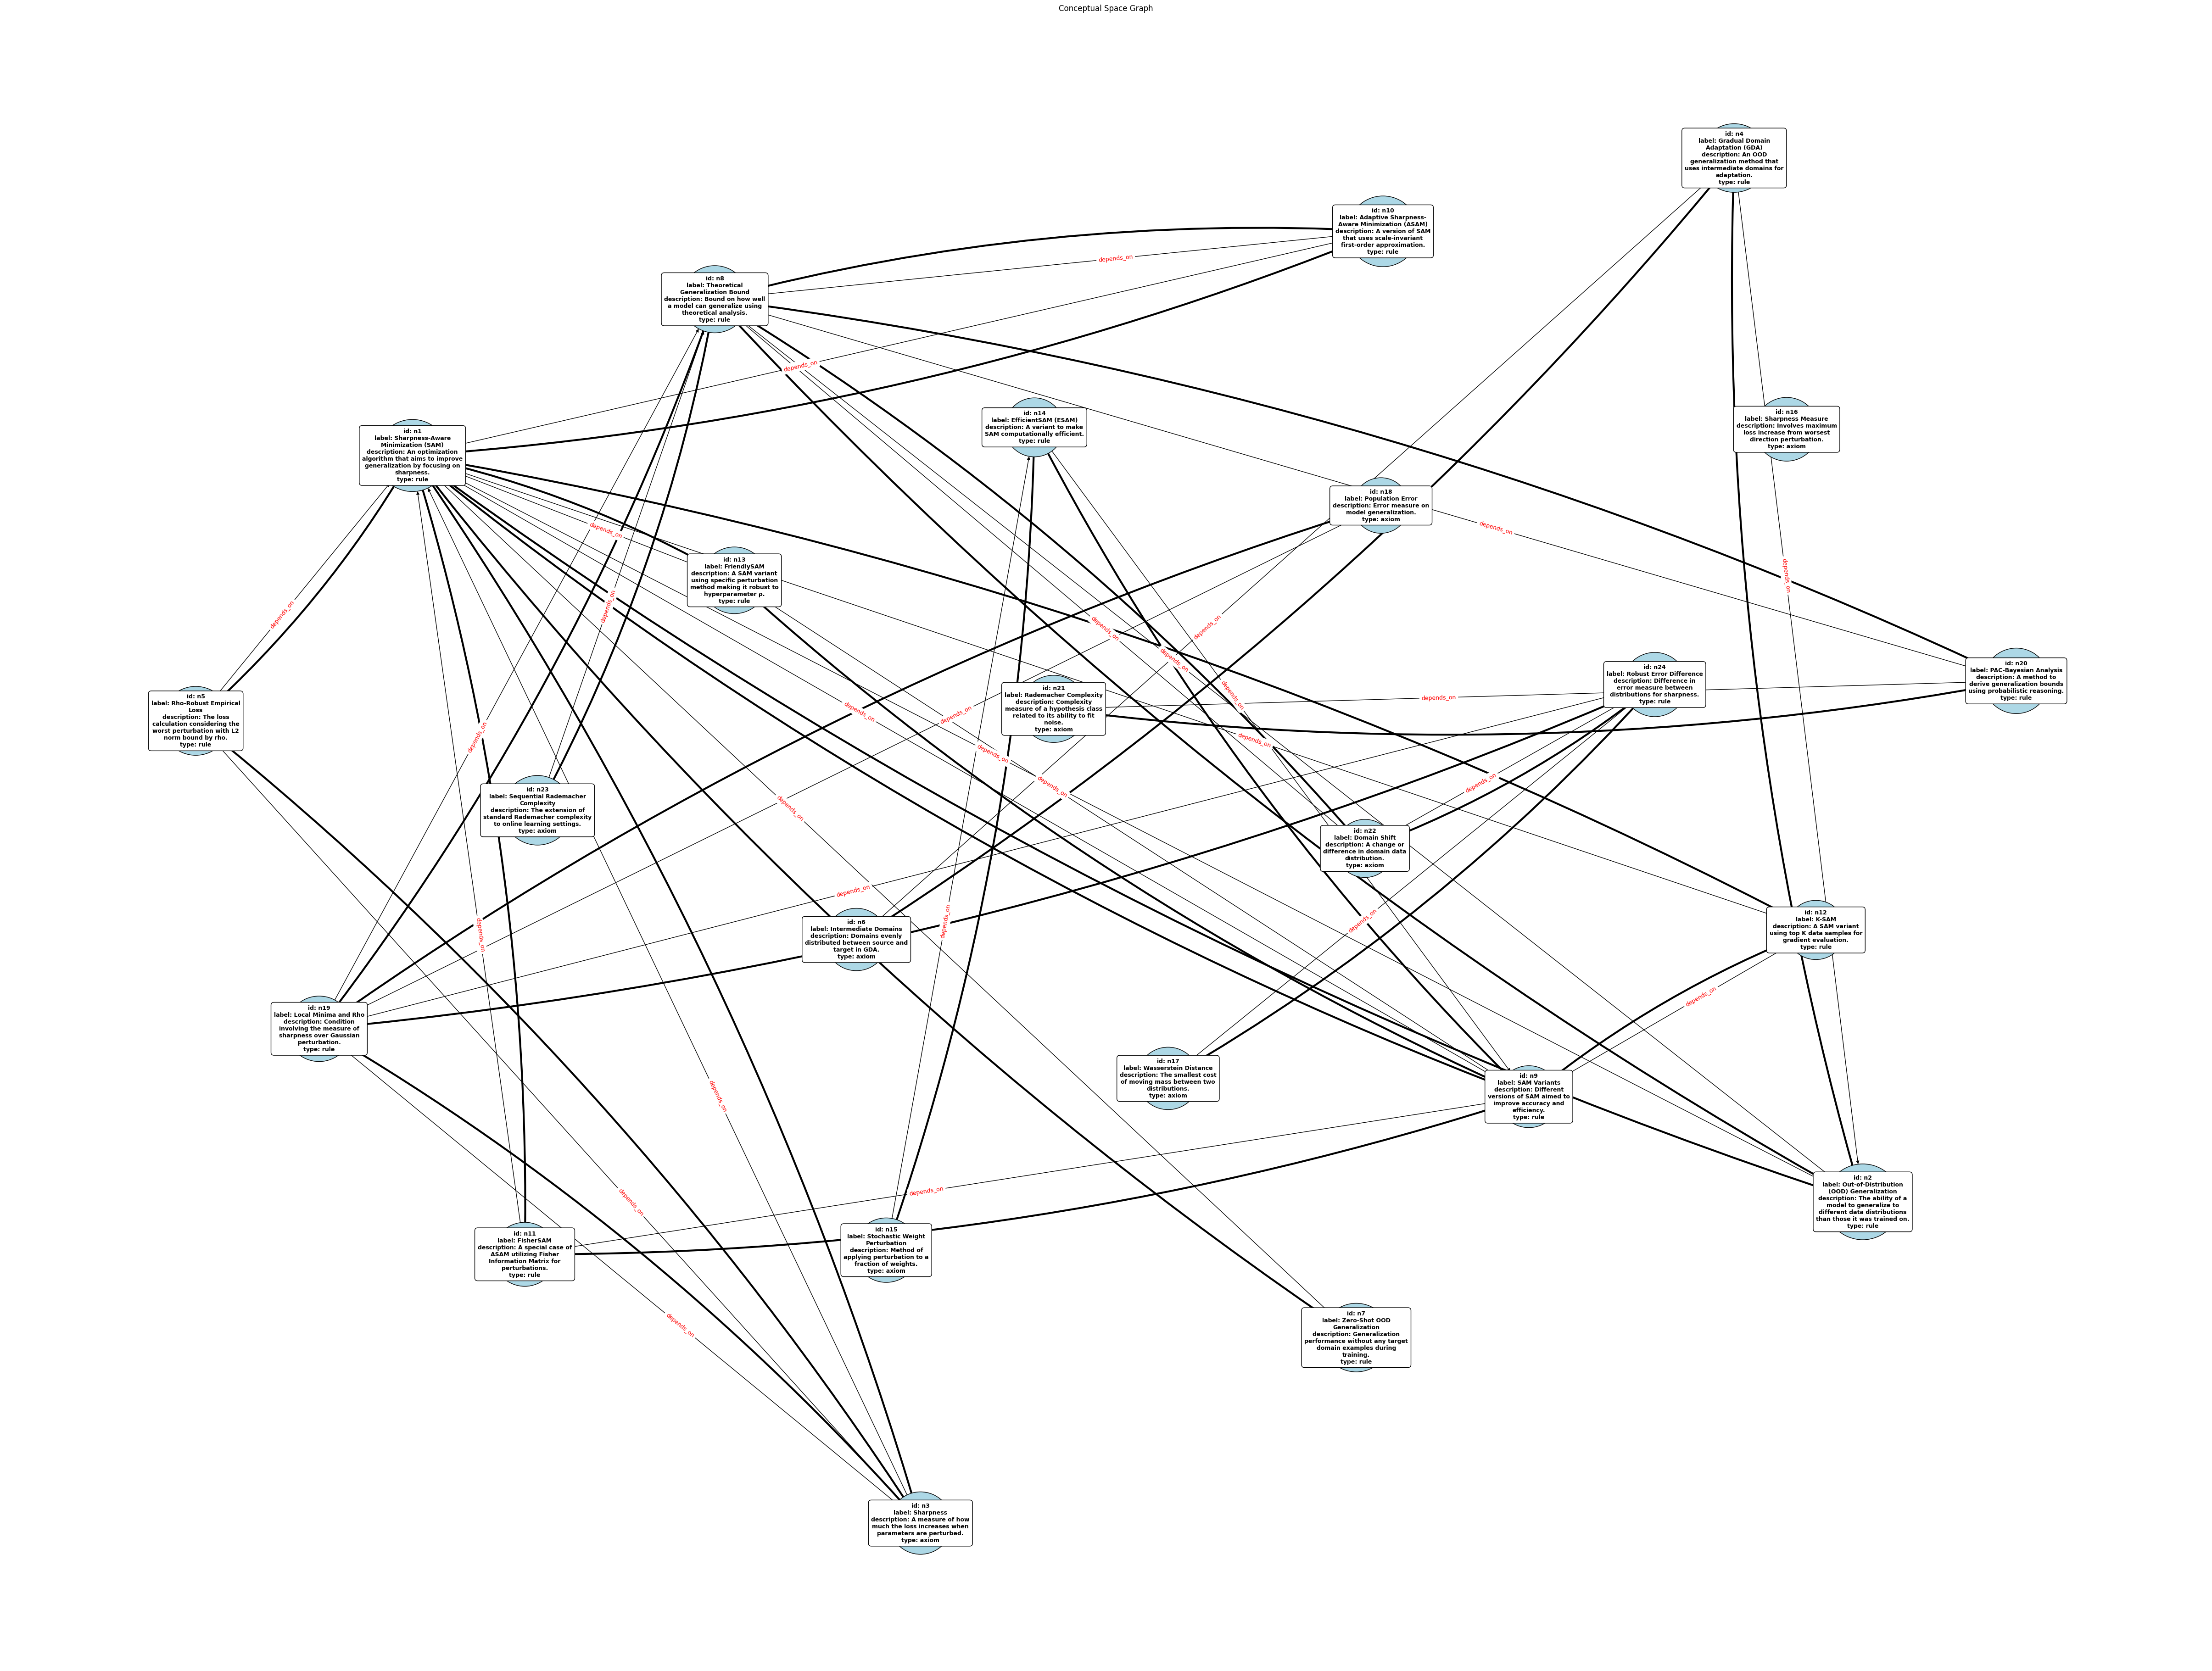

In [ ]:
# Obtain english formalized claims from the seed paper json
english_claims = ''
for i in range(len(final_data['axioms'])):
    english_claims += final_data['axioms'][i]['english'] + '\n'

concept_space = get_conceptual_space_from_paper(SEED_PAPER_NAME, english_claims)
visualize_conceptual_space(concept_space)

# TODO: recursively search through literature to build a comprehensive conceptual space
# Embed the description of each axiom and then compare it with literature embeddings to find related works

In [36]:
from collections import Counter

# Obtain all axioms and all rules separately
axioms_list = [node for node in concept_space['nodes'] if node.get('type') == 'axiom']
rules_list = [node for node in concept_space['nodes'] if node.get('type') == 'rule']

# Count incoming edges for each axiom

# Map node ids to node objects for quick lookup
node_id_to_axiom = {node['id']: node for node in axioms_list}

# Count incoming edges for each axiom node
incoming_counts = Counter()
for edge in concept_space['edges']:
    target_id = edge.get('source')
    if target_id in node_id_to_axiom:
        incoming_counts[target_id] += 1

# Find the axiom with the most incoming edges
if incoming_counts:
    max_incoming_axiom_id = incoming_counts.most_common(1)[0][0]
    max_incoming_axiom = node_id_to_axiom[max_incoming_axiom_id]
else:
    # If no incoming edges, just pick the first axiom as a fallback (or None if list is empty)
    max_incoming_axiom = axioms_list[0] if axioms_list else None

max_incoming_axiom

{'id': 'n3',
 'label': 'Sharpness',
 'description': 'A measure of how much the loss increases when parameters are perturbed.',
 'type': 'axiom'}